In [1]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.impute import SimpleImputer # For checking NaN values
import numpy as np  # For numerical operations

# Import data from .csv file
dataset = pd.read_csv('owid-energy-data full-1.csv')

# Display a preview of the dataset to verify successful import and understand its structure
dataset

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21586,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21587,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21588,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [2]:
# Display the summary statistics of the dataset for initial insights
dataset.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,21590.000000,1.822400e+04,1.113800e+04,1747.000000,2687.000000,2302.000000,2767.000000,5278.000000,5529.000000,5494.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7070.000000,8000.000000,4065.000000,6885.000000,4101.000000
mean,1973.675498,1.049096e+08,3.578413e+11,46.091694,2.719074,133.558459,38.068209,63.043115,10.904961,1.852920,...,0.626012,0.210395,267.541206,7.314174,53.422938,62.769786,17.529972,232.108949,1.401382,0.651413
std,35.155113,4.628010e+08,2.408514e+12,274.616745,10.057018,264.707851,111.623148,196.689187,47.612938,5.104237,...,2.077071,0.643304,5940.944120,37.327922,273.255306,252.659338,101.380285,733.841324,4.482261,1.893820
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1945.000000,1.726186e+06,1.368156e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,6.990115e+06,4.174163e+10,8.179000,0.000000,15.482000,0.673000,0.135000,0.010000,0.065500,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,2003.000000,2.558270e+07,1.741312e+11,26.508500,0.861500,165.266750,13.629500,34.992500,0.680000,1.567750,...,0.096000,0.018500,47.971000,0.315000,2.357750,2.099500,0.139000,45.523000,0.372000,0.268000
max,2022.000000,7.975105e+09,1.136302e+14,5659.328000,141.131000,2588.512000,1199.207000,2514.102000,675.110000,71.429000,...,40.000000,7.586000,242384.844000,665.413000,5487.600000,3218.151000,2098.460000,8422.012000,56.840000,26.157000


In [3]:
# List of ASEAN member states for filtering the dataset
asean_member_states = [
    "Brunei", 
    "Cambodia", 
    "Indonesia", 
    "Laos", 
    "Malaysia", 
    "Myanmar", 
    "Philippines", 
    "Singapore", 
    "Thailand", 
    "Vietnam"]

# List of years to be included in the filtered dataset
included_years = [2017, 2018, 2019, 2020, 2021, 2022]

# List of column names to be retained in the filtered dataset
column_names = [
    'country',
    'year',
    'population',
    'gdp',
    'biofuel_consumption',
    'coal_consumption',
    'fossil_fuel_consumption',
    'gas_consumption',
    'hydro_consumption',
    'oil_consumption',
    'wind_consumption',
    'other_renewable_consumption',
    'solar_consumption'
]

# Filtering the dataset for the specified years and countries
filtered_year_dataset = dataset[(dataset['year'].isin(included_years)) & (dataset['country'].isin(asean_member_states))]

# Selecting only the specified columns
filtered_year_dataset = filtered_year_dataset[column_names]

# Displaying the filtered dataset
filtered_year_dataset

,country,year,population,gdp,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,oil_consumption,wind_consumption,other_renewable_consumption,solar_consumption
3186,Brunei,2017,430290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3187,Brunei,2018,434283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3188,Brunei,2019,438058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3189,Brunei,2020,441736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,Brunei,2021,445382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,Brunei,2022,449002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3575,Cambodia,2017,15830694.0,5.537077e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3576,Cambodia,2018,16025242.0,5.954185e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577,Cambodia,2019,16207746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3578,Cambodia,2020,16396864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop 'country' and 'year' columns from the filtered dataset
filtered_dataset = filtered_year_dataset.drop(columns=['country', 'year'])

In [5]:
def plot_gdp_regression(column_number):    
    # Set the size of each subplot
    plt.figure(figsize=(20,10))

    # Create a scatter plot
    sns.scatterplot(x=filtered_dataset[filtered_dataset.columns[column_number]], y=filtered_dataset['gdp']) # Scatter plot of GDP vs feature
    plt.title(f'Scatter Plot of GDP vs {filtered_dataset.columns[column_number]}') # Title for the subplot

    # Extract the independent and dependent variables
    X = filtered_dataset [filtered_dataset.columns[column_number]].values.reshape(-1, 1) # Independent variable
    y = filtered_dataset ['gdp'].values.reshape(-1, 1)  # Dependent variable

    # Initialize the SimpleImputer with the mean strategy
    imputer = SimpleImputer(strategy='mean')

    # Apply the imputer to handle any missing values
    X_imputed = imputer.fit_transform(X)
    y_imputed = imputer.fit_transform(y)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_imputed, y_imputed)

    # Extract the slope (coefficient) and intercept
    slope = model.coef_[0][0]  
    intercept = model.intercept_[0]

    # Add the regression line
    plt.plot(filtered_dataset[filtered_dataset.columns[column_number]], model.predict(X_imputed), 'r', label=f'y={slope}*x+{intercept}')

    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(X_imputed.flatten(), y_imputed.flatten())[0, 1]

    # Add the correlation coefficient to the plot title
    plt.title(f'Scatter Plot of GDP vs {filtered_dataset.columns[column_number]} (Correlation: {correlation_coefficient:.2f})')

    # Add legend and grid
    plt.legend()
    plt.grid(True) 

    # Show the plot
    plt.show()

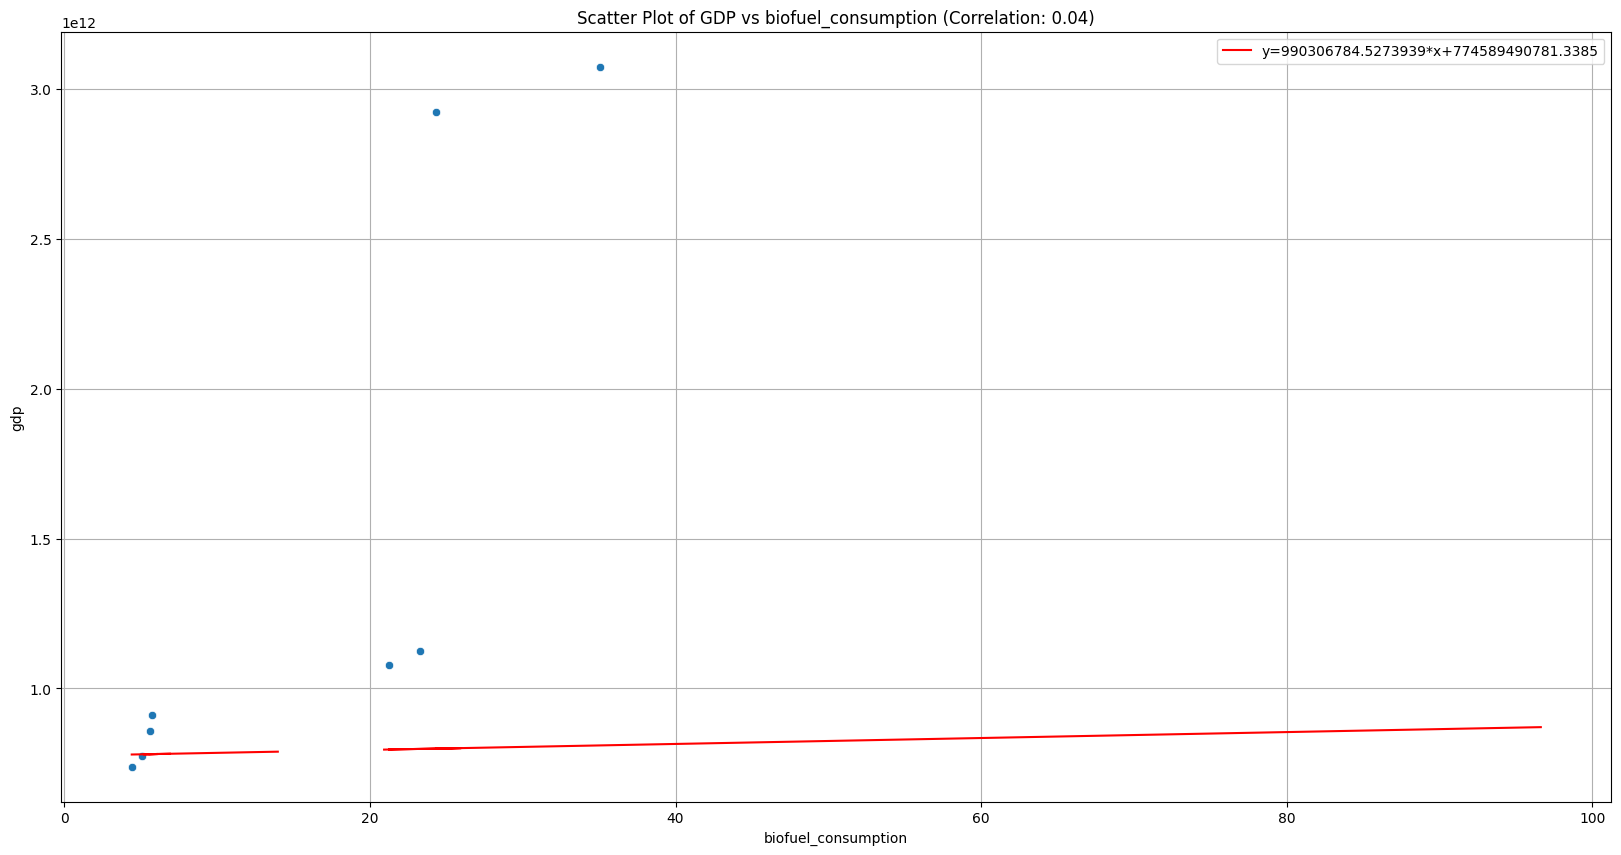

In [6]:
plot_gdp_regression(2)

- **By looking at the scatterplot, is there a correlation between each pair?**

    - The scatterplot depicting the relationship between GDP and biofuel consumption reveals a very weak positive correlation, borderline no correlation at all.

- **Are the correlations intuitive or do they make sense?**

    - Looking beyond the very weak positive correlation evident in the scatterplot, there exists a logical connection between GDP and biofuel consumption. Biofuel consumption in a country can positively influence its GDP, as the utilization of biofuel signifies a progressive, eco-friendly approach to energy sourcing. This correlation implies that a country embracing biofuel is likely advancing its economic development.

- **Are there any outliers?**

    - We can see two outliers in this scatterplot near the top-left corner, almost reaching the middle of the plot.

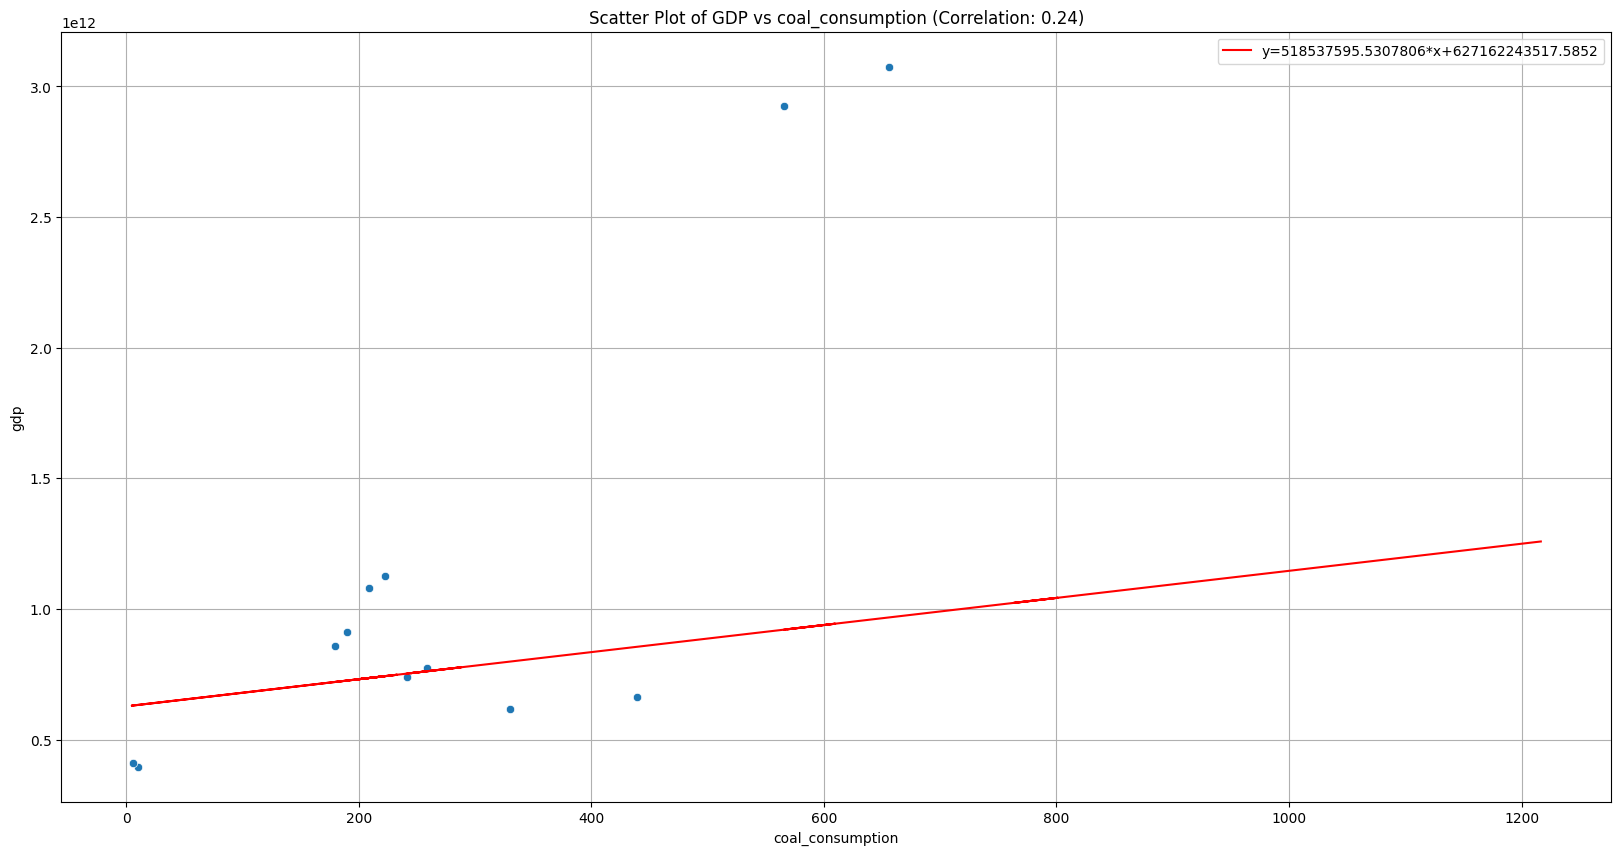

In [7]:
plot_gdp_regression(3)

- **By looking at the scatterplot, is there a correlation between each pair?**

    - Examining the scatterplot depicting the relationship between GDP and coal consumption, a weak positive correlation becomes apparent.

- **Are the correlations intuitive or do they make sense?**

    - The scatter plot reveals a weak positive correlation between GDP and coal consumption, a relationship that aligns with economic logic. Increased coal usage, typically associated with production, indicates higher industrial activity, implying that a country is manufacturing more goods.

- **Are there any outliers?**

    - In this scatterplot, we can clearly see two outliers at the top-middle of the plot.

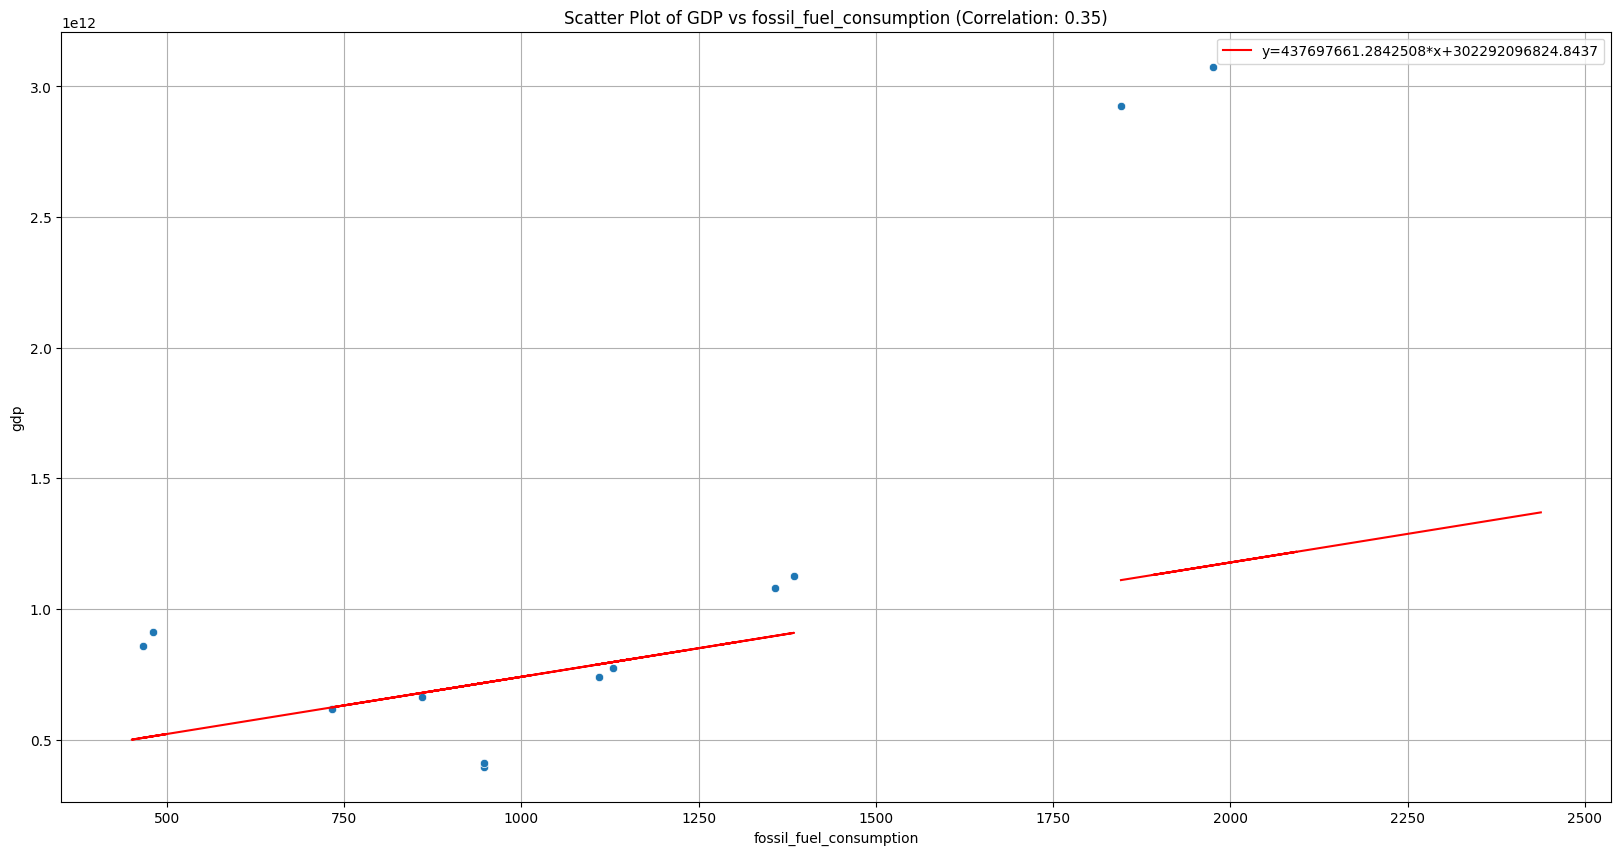

In [8]:
plot_gdp_regression(4)

- **By looking at the scatterplot, is there a correlation between each pair?**

    - Looking at the scatterplot depicting the relationship between GDP and fossil fuel consumption, a weak positive correlation between the two variables emerges.

- **Are the correlations intuitive or do they make sense?**

    - The scatterplot illustrates a weak positive correlation between the two variables, mirroring the pattern observed in the previous scatterplot. Higher fossil fuel consumption often signifies higher industrial activity and increased production of goods, which aligns with economic logic.

- **Are there any outliers?**

    - Observing the scatterplot, there are two outliers near the edge at the top-right corner of the plot.

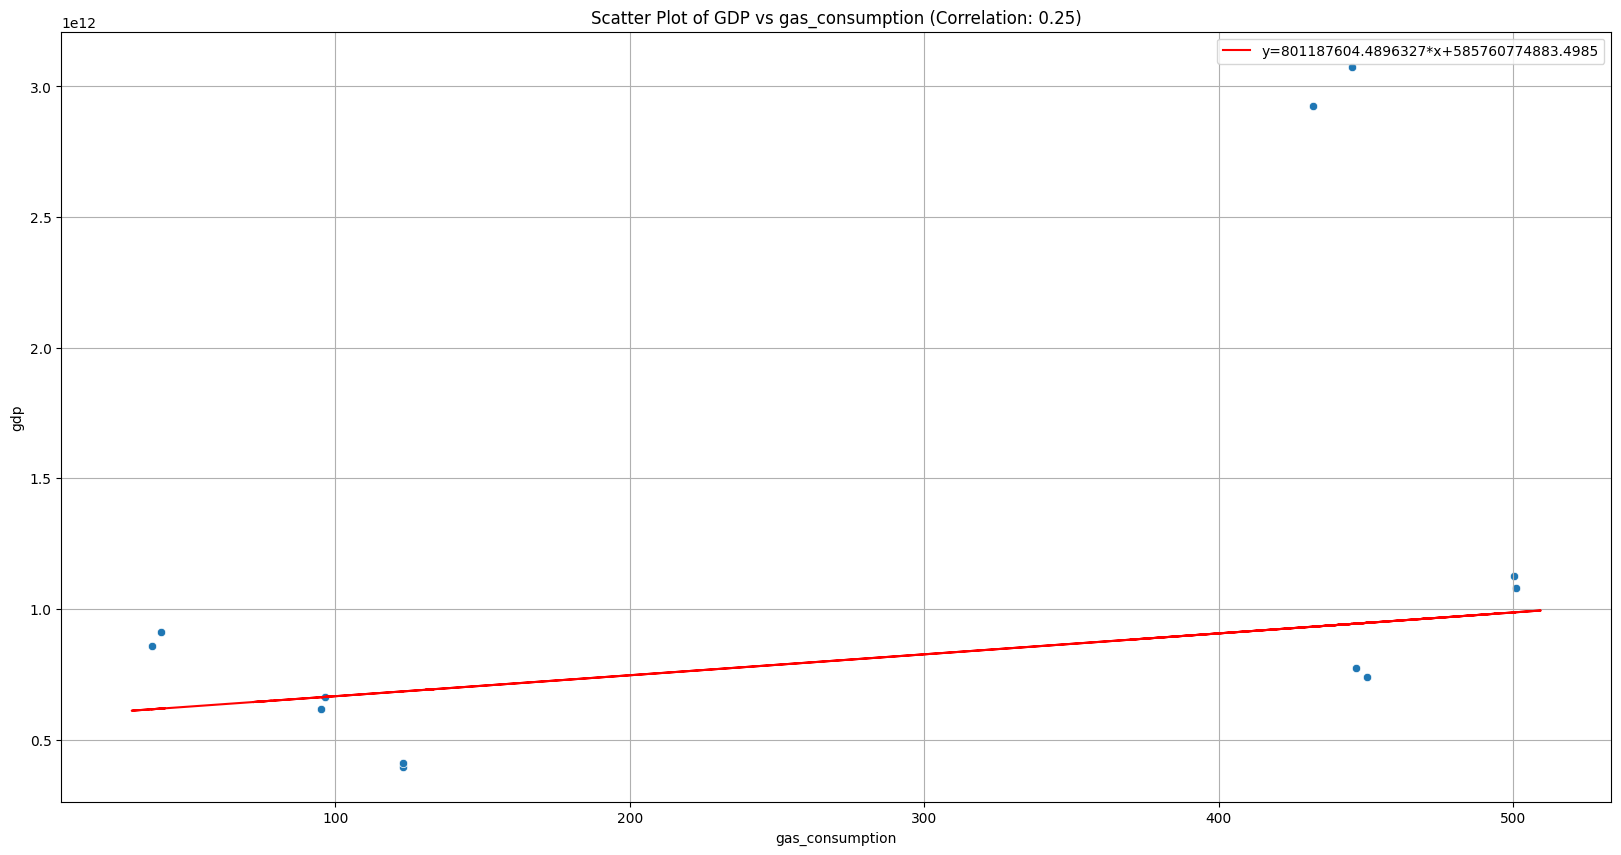

In [9]:
plot_gdp_regression(5)

- **By looking at the scatterplot, is there a correlation between each pair?**

    - In the scatterplot depicting the relationship between GDP and gas consumption, a weak positive correlation between the two variables is evident.

- **Are the correlations intuitive or do they make sense?**

    -  Similar to the preceding two scatterplots, the relationship between GDP and gas consumption exhibits a weak positive correlation. This correlation is intuitive and aligns with economic logic. Gas consumption is primarily linked to industrial activity, just like the previous two relationships, indicative of heightened production of goods.

- **Are there any outliers?**

    - When examining the scatterplot, we can identify two apparent outliers on the plot, which are situated at the top right corner.

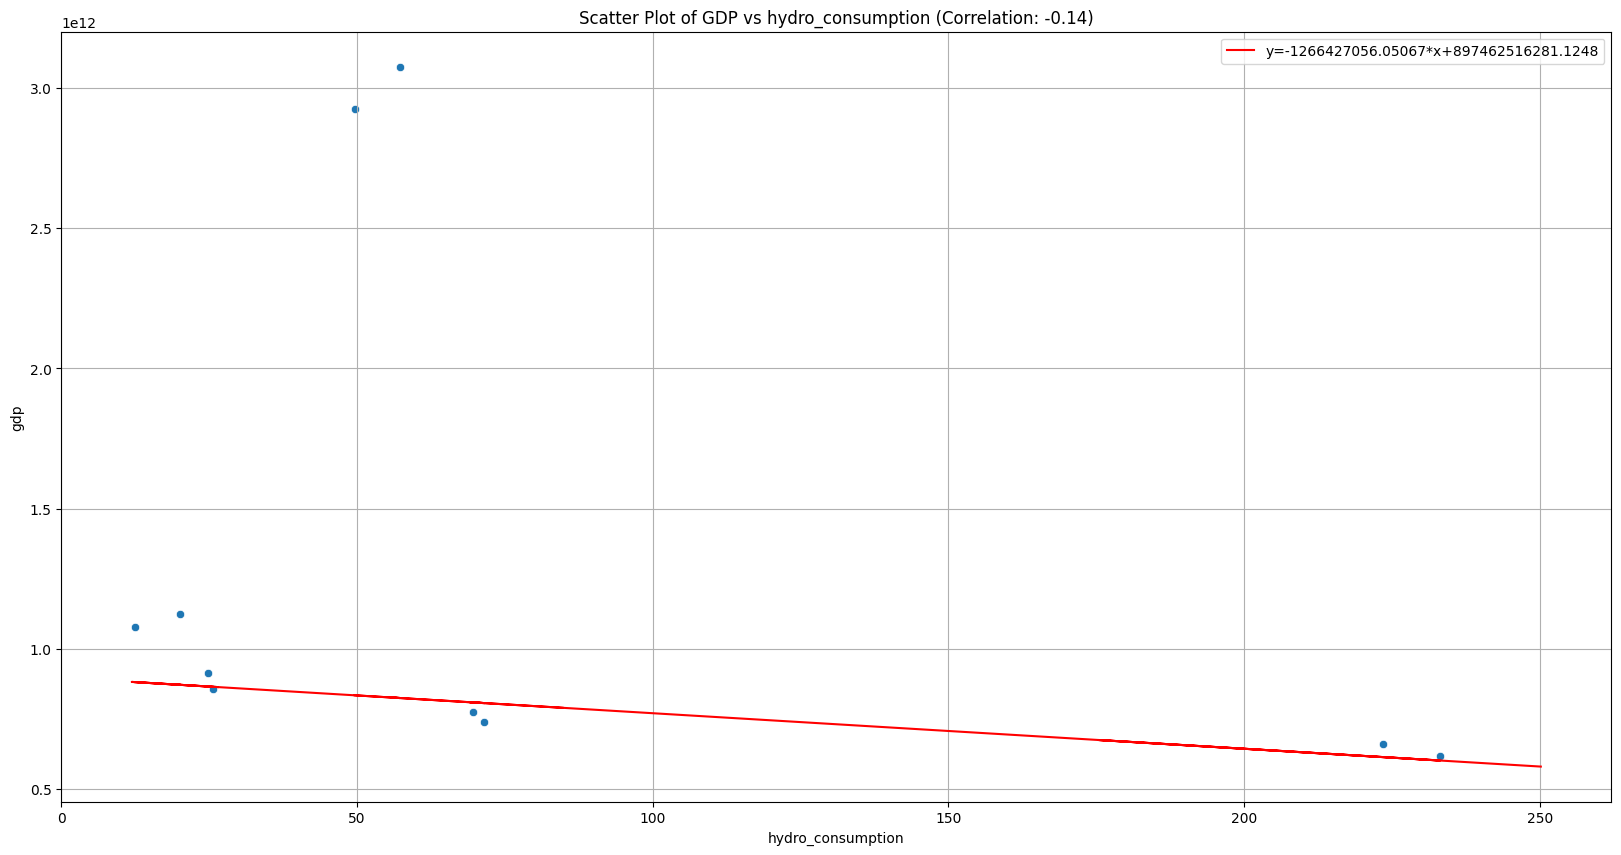

In [10]:
plot_gdp_regression(6)

- **By looking at the scatterplot, is there a correlation between each pair?**
 
    - Observing the relationship between GDP and hydro consumption, we can discern a very weak negative correlation between the two variables.

- **Are the correlations intuitive or do they make sense?**

    - Examining the scatterplot, the depicted relationship appears counterintuitive and does not make sense. It suggests that as hydro consumption increases, GDP decreases. However, this contradicts conventional knowledge, as greater utilization of renewable energy, such as hydroelectric power, typically reduces energy costs for a country, freeing up financial resources for investment in other areas.

- **Are there any outliers?**

    - Looking at the scatterplot, two outliers are noticeable on the upper left, positioned just above the main cluster of data points.

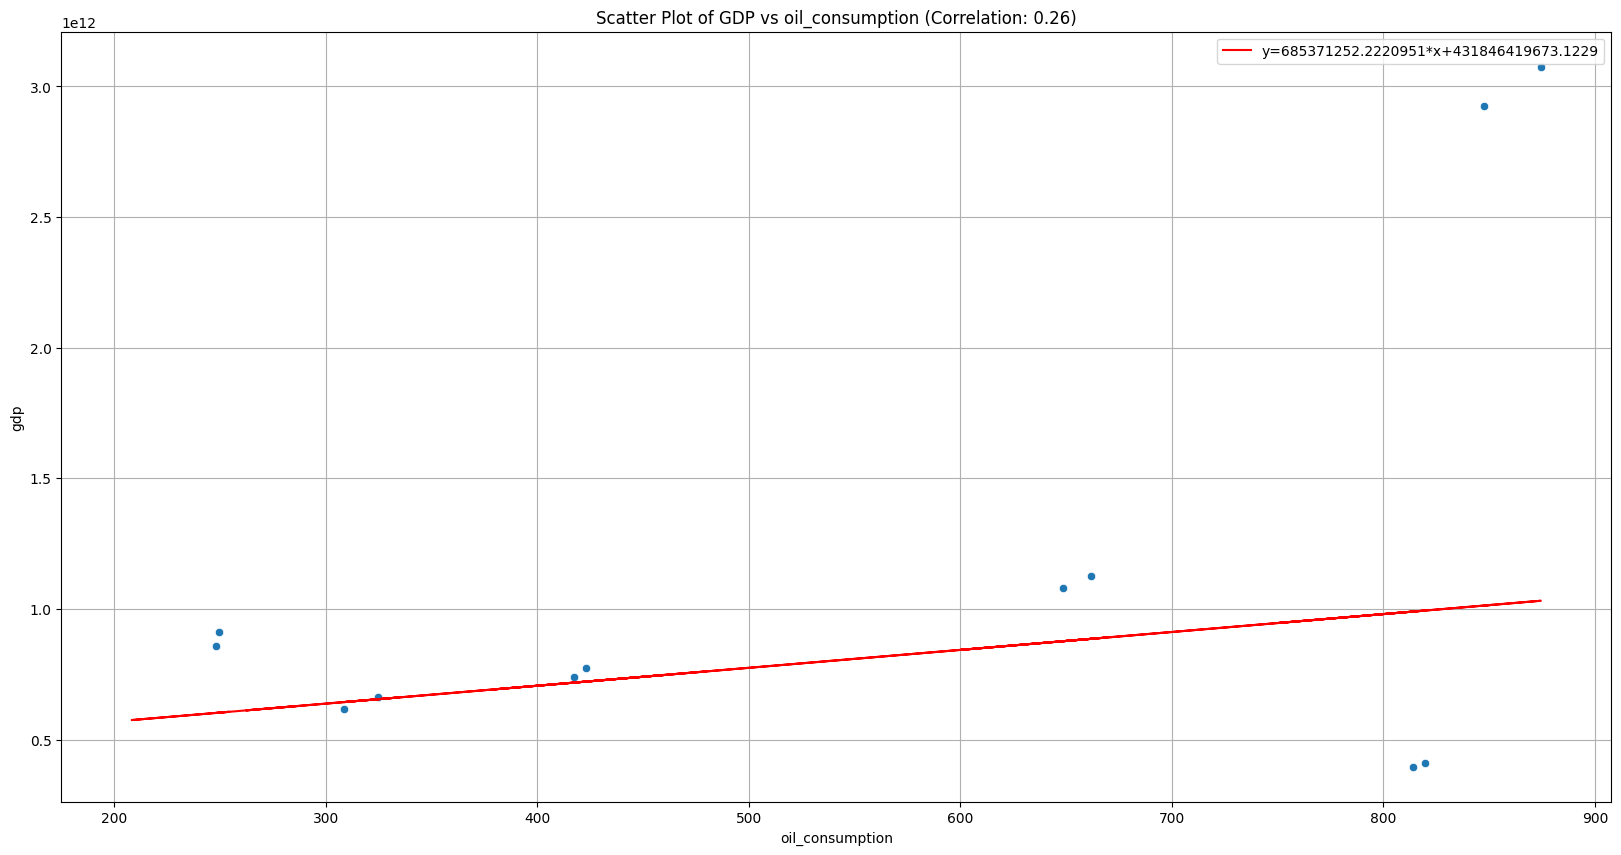

In [11]:
plot_gdp_regression(7)

- **By looking at the scatterplot, is there a correlation between each pair?**

    - When viewing the scatterplot depicting the relationship between GDP and oil consumption, a weak positive correlation between the two variables can be observed.

- **Are the correlations intuitive or do they make sense?**

    - The weak positive relationship between GDP and oil consumption evident on the scatterplot is intuitive. Increased oil consumption signifies extensive use across various transportation modes (land, air, and water), suggesting heightened economic activity. This encompasses everything from increased employment to the delivery of goods.

- **Are there any outliers?**

    - Examining the scatterplot, we can identify two outliers positioned at the top right-hand corner of the plot.

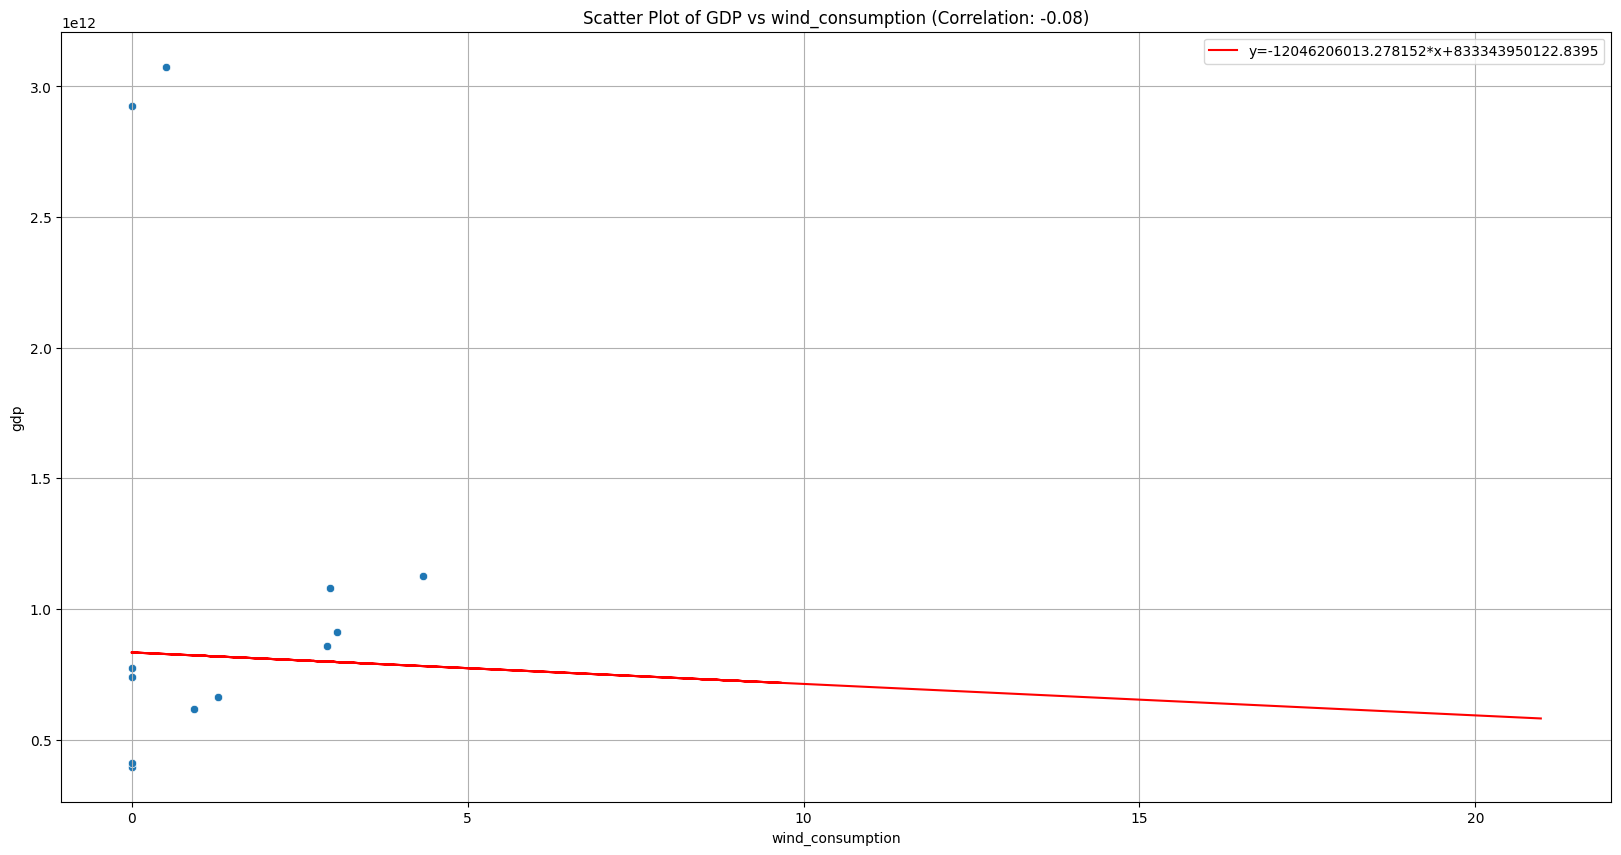

In [12]:
plot_gdp_regression(8)

- **By looking at the scatterplot, is there a correlation between each pair?**

    - The scatterplot depicting the relationship between GDP and wind consumption showcases a very weak negative correlation, bordering on having no correlation at all.

- **Are the correlations intuitive or do they make sense?**

    - Despite the very weak negative correlation, potentially influenced by incomplete data, the relationship between GDP and wind consumption remains intuitive and logical. However, the negative correlation observed in the scatterplot contradicts the expected outcome. As mentioned earlier in the context of GDP and hydro consumption, when a country opts for increased use of renewable energy sources, such as wind, the funds allocated for energy can be redirected to other industries, potentially boosting GDP. This discrepancy challenges the interpretation provided by the scatterplot.

- **Are there any outliers?**

    - Observing the scatterplot, we can identify outliers pretty easily. Two outliers are notably positioned just above the primary cluster of data points, situated at the upper left-most corner of the plot.

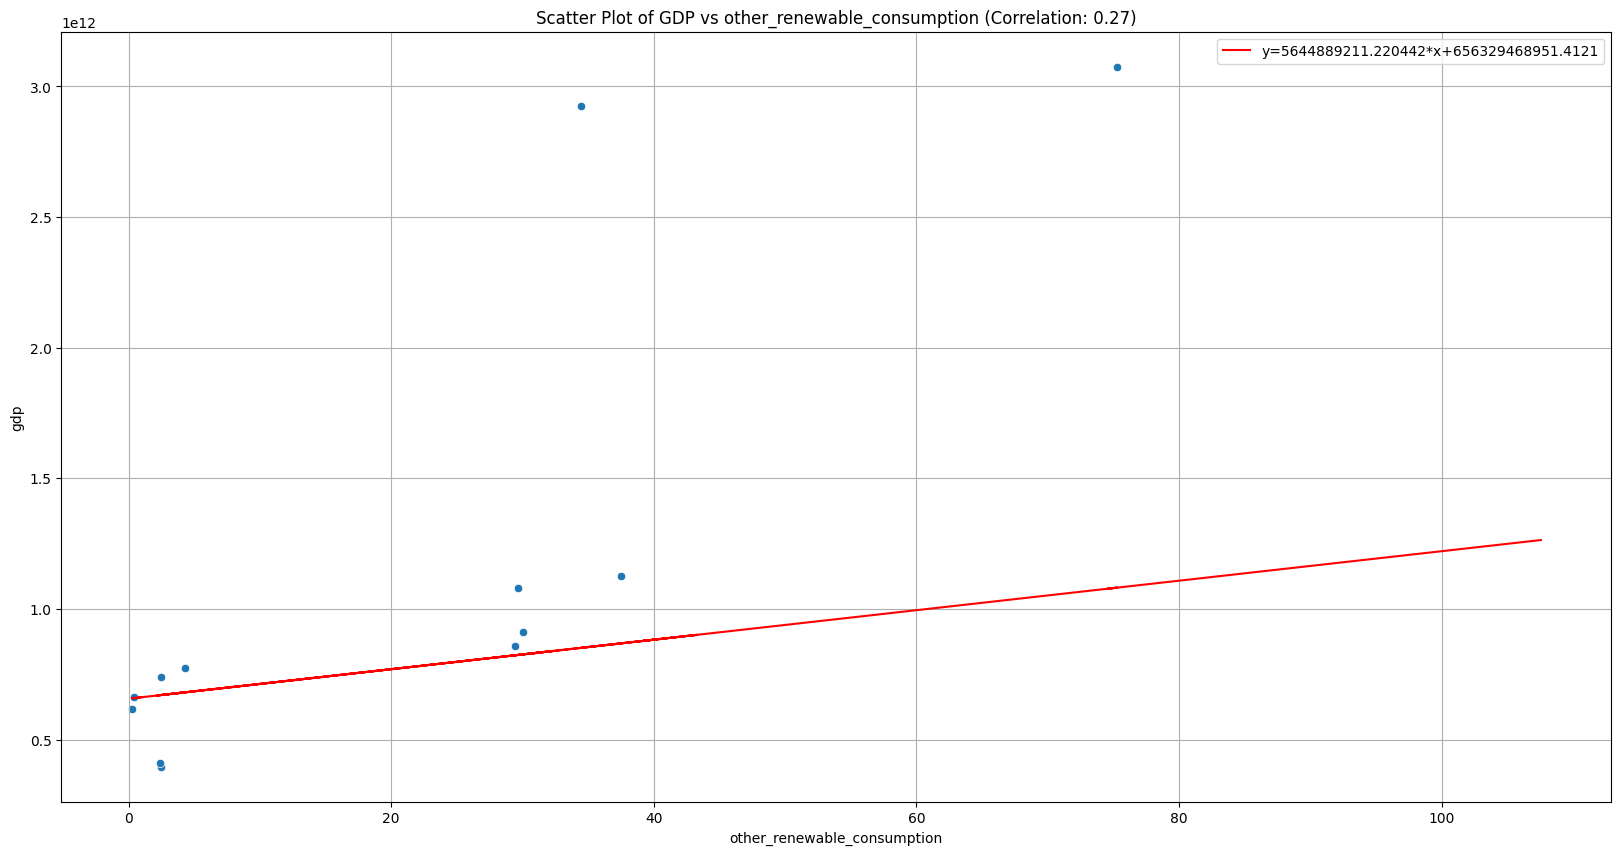

In [13]:
plot_gdp_regression(9)

- **By looking at the scatterplot, is there a correlation between each pair?**

    - Analyzing the scatterplot depicting the relationship between GDP and other renewable energy consumption, we can observe a weak positive correlation between the two variables.

- **Are the correlations intuitive or do they make sense?**

    - Compared to previous scatterplots focusing on renewable energy, this particular visualization appears intuitive and coherent. As previously discussed, countries that invest more in renewable energy can often allocate additional resources to other sectors, consequently enhancing their GDP, as reflected in this scatterplot.

- **Are there any outliers?**

    - In this scatterplot, two outliers are evident at the uppermost region. They are distinctly positioned apart from each other, with one leaning more towards the left side, while the other is situated towards the right. These outliers stand out from the rest of the data points.

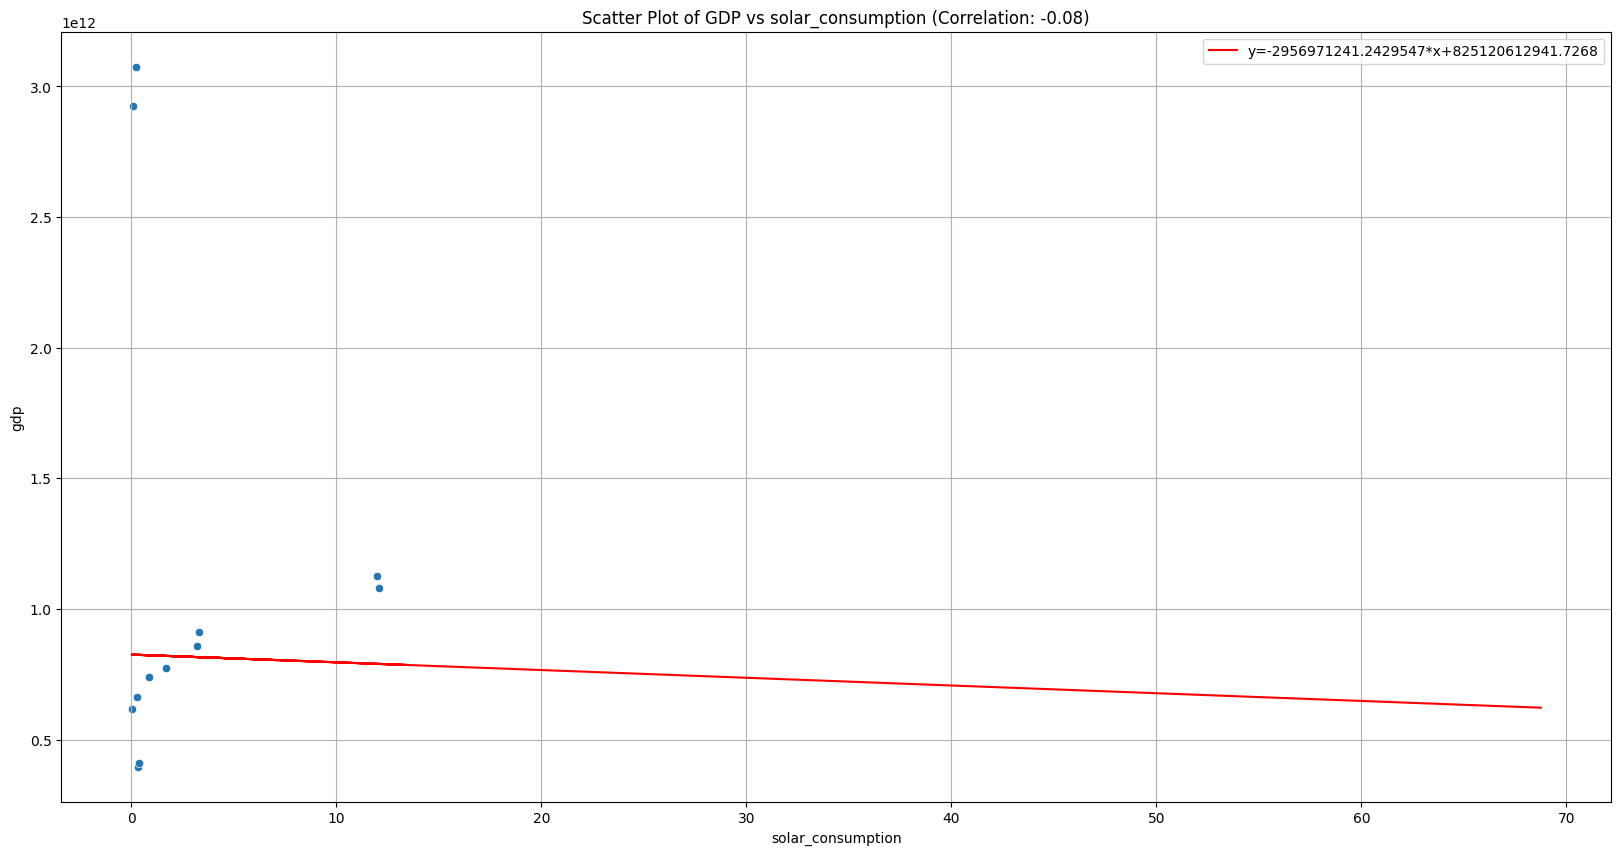

In [14]:
plot_gdp_regression(10)

- **By looking at the scatterplot, is there a correlation between each pair?**

    - Upon examining the scatterplot illustrating the relationship between GDP and solar consumption, we can observe a very weak negative correlation between the two variables.

- **Are the correlations intuitive or do they make sense?**

    - This scatterplot follows a similar pattern to previous scatterplots of renewable energy sources, except for other renewable energy consumption, where the correlations are not intuitive, as previously discussed. As repeatedly emphasized, when a country chooses to increase its utilization of renewable energy, such as solar energy, its GDP should ideally rise. This is due to the reduction in costs associated with producing and consuming energy, which creates opportunities for the country to allocate more budget to sectors that can further enhance its GDP.
    
- **Are there any outliers?**

    - When analyzing the scatterplot, we can see two outliers positioned above the main cluster of data points, towards the upper-left section of the plot.